Zapytanie sql do wyciągnięcia wyników:

```sql
SELECT substring(r.createdat::TEXT from 0 for 11) as result_date, min(r.firstnurserystanding), min(r.secondnurserystanding), min(r.thirdnurserystanding) FROM result r GROUP BY result_date ORDER BY result_date DESC;
```

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [83]:
result = pd.read_csv('data/20190116_results.csv', index_col=0, parse_dates=True, names=['Data', 'Nursery01', 'Nursery02', 'Nursery03'])

In [85]:
result.tail()

,Nursery01,Nursery02,Nursery03
Data,,,
2019-01-12,123,136,136
2019-01-13,123,136,136
2019-01-14,123,136,136
2019-01-15,123,136,136
2019-01-16,123,136,136


In [330]:
import datetime
todays_date = datetime.datetime.now().date()
index = pd.date_range(todays_date-datetime.timedelta(0), periods=200, freq='D')
columns = ['Nursery01','Nursery02', 'Nursery03']
df_ = pd.DataFrame(index=index, columns=columns)
df_.tail()

,Nursery01,Nursery02,Nursery03
2019-07-30,NaN,NaN,NaN
2019-07-31,NaN,NaN,NaN
2019-08-01,NaN,NaN,NaN
2019-08-02,NaN,NaN,NaN
2019-08-03,NaN,NaN,NaN


In [289]:
result2 = result.append(df_)

In [331]:
result2.tail()

,Nursery01,Nursery02,Nursery03
2019-07-30,NaN,NaN,NaN
2019-07-31,NaN,NaN,NaN
2019-08-01,NaN,NaN,NaN
2019-08-02,NaN,NaN,NaN
2019-08-03,NaN,NaN,NaN


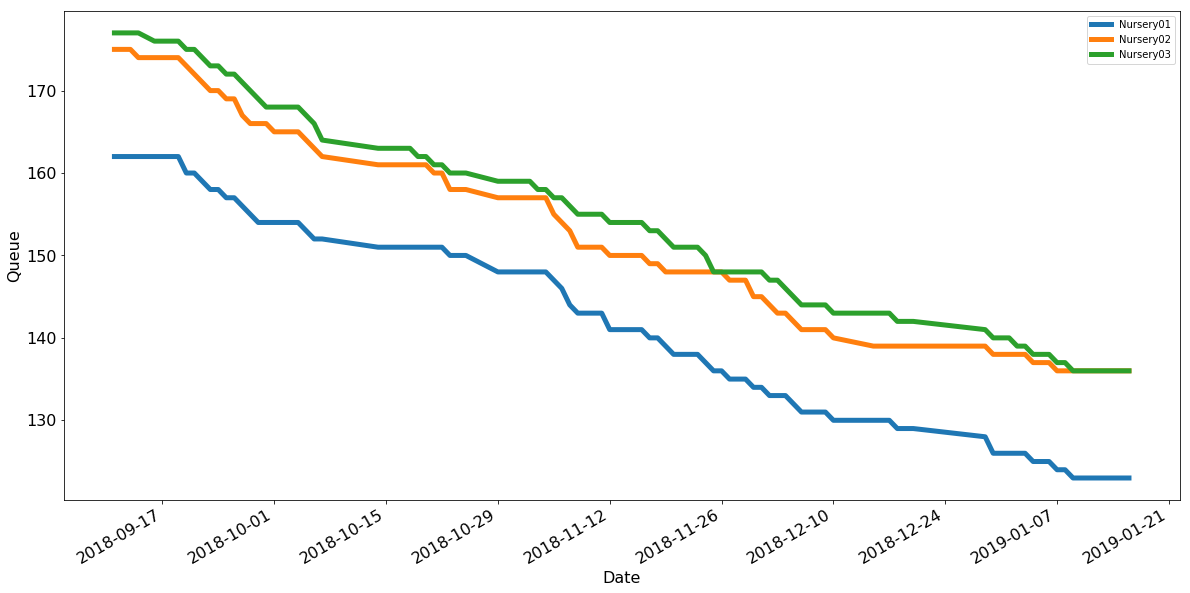

In [291]:
result.plot(figsize=(20,10), linewidth=5, fontsize=16)
plt.xlabel('Date', fontsize=16);
plt.ylabel('Queue', fontsize=16);

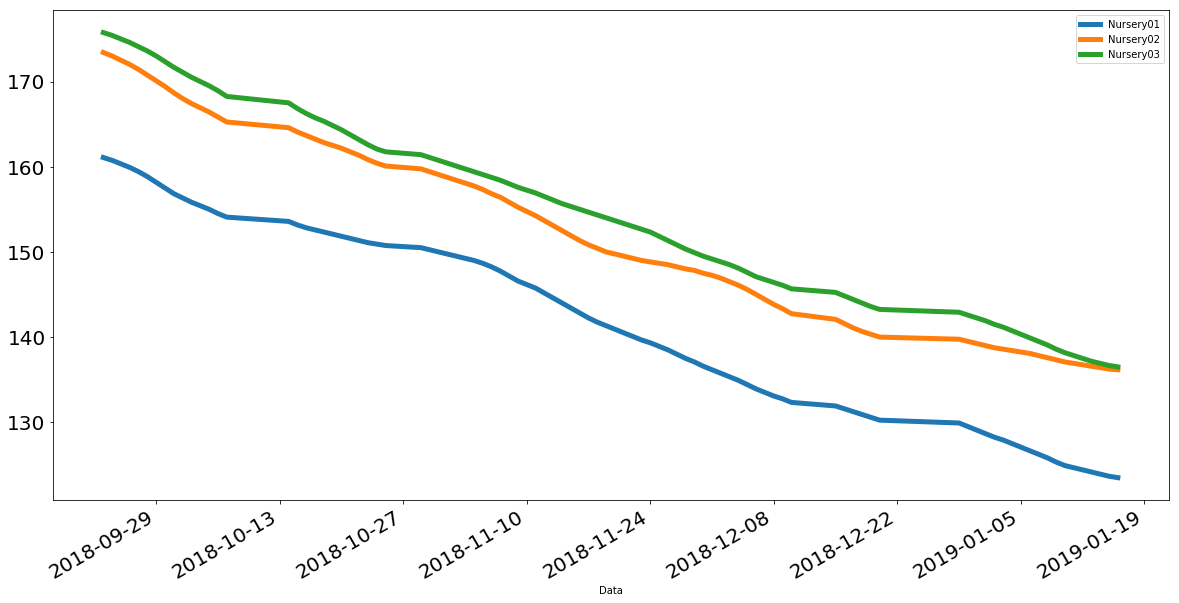

In [292]:
result.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)

In [293]:
result.index

DatetimeIndex(['2018-09-11', '2018-09-12', '2018-09-13', '2018-09-14',
               '2018-09-16', '2018-09-17', '2018-09-18', '2018-09-19',
               '2018-09-20', '2018-09-21',
               ...
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14',
               '2019-01-15', '2019-01-16'],
              dtype='datetime64[ns]', name='Data', length=106, freq=None)

In [332]:
result['Nursery01'].tail()

Data
2019-01-12    123
2019-01-13    123
2019-01-14    123
2019-01-15    123
2019-01-16    123
Name: Nursery01, dtype: int64

In [295]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106 entries, 2018-09-11 to 2019-01-16
Data columns (total 3 columns):
Nursery01    106 non-null int64
Nursery02    106 non-null int64
Nursery03    106 non-null int64
dtypes: int64(3)
memory usage: 3.3 KB


In [333]:
train = result2[0:106]

In [334]:
test = result2[106:]

In [335]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [336]:
y_hat_avg = test.copy()

In [337]:
fit1 = Holt(np.asarray(train['Nursery01'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)

In [338]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

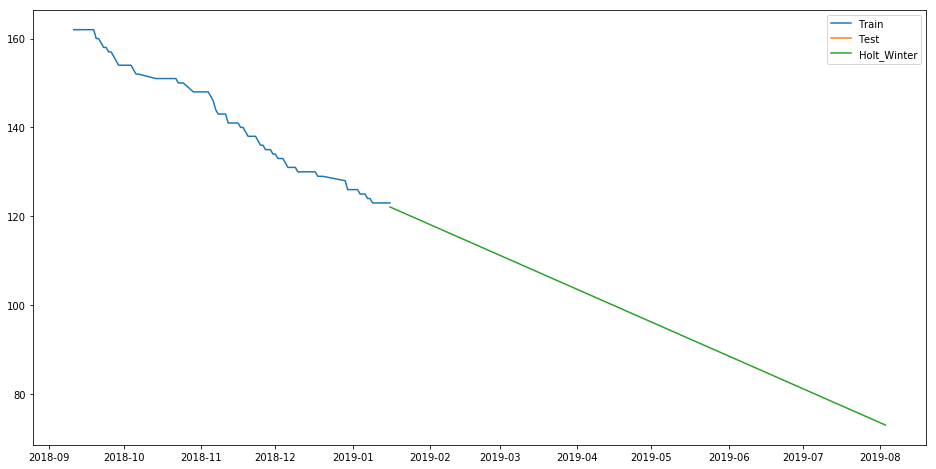

In [339]:
plt.figure(figsize=(16,8))
plt.plot(train['Nursery01'], label='Train')
plt.plot(test['Nursery01'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()